## Word frequency

In [1]:
reader = open("europarl-v7.hu-en.hu", "r")
writer = open("word_freq.txt", "w")

word_list = {}
word_count_list = {}

for word in reader.read().split():
    if word not in word_list:
        word_list[word] = 1
    else:
        word_list[word] += 1
        
for word in word_list.keys():
    count = word_list[word]
    
    if count not in word_count_list:
        word_count_list[count] = [word]
        
    else:
        word_count_list[count].append(word)
        
        
for count in sorted(word_count_list, reverse = True):
    for word in sorted(word_count_list[count]):
        writer.write("{0}\t{1}\n".format(word,count))
        



reader.close()
writer.close()


## Word frequency with Counter

In [2]:
from collections import Counter


def word_freq(data): 
    word_counter = Counter()

    for word in data:
        word_counter[word] += 1
    
    return word_counter
    


## Character frequency

In [3]:
reader = open("europarl-v7.hu-en.hu", "r")
writer = open("char_freq.txt", "w")

character_list = {}
character_count_list = {}

for word in reader.read().split():
    for char in list(word):
        
        if char not in character_list:
            character_list[char] = 1
        else:
            character_list[char] += 1
            

for char in character_list.keys():
    count = character_list[char]
    
    if count not in character_count_list:
        character_count_list[count] = [char]
    else:
        character_count_list[count].append(char)
    
            
for count in sorted(character_count_list, reverse = True):
    for char in sorted(character_count_list[count]):
        writer.write("{0}\t{1}\n".format(char,count))
        

        
reader.close()
writer.close()

## Character frequency with Counter

In [4]:
def char_freq(data):
    character_counter = Counter()
    
    for word in data:
        for c in word:
            character_counter[c] += 1
    
    return character_counter

In [5]:
def char_freq_N(data):
    character_counter = Counter()

    for word in data:
        if "_NUM_" in word:
            if word == "_NUM_":
                character_counter["_NUM_"] +=1
            else:
                ws = word.split('_NUM_')
                for i in ws:
                    for c in list(i):
                        character_counter[c] += 1
        
        else:
            for char in list(word):
                if char.isdigit():
                    character_counter["_NUM_"] +=1
                else:
                    character_counter[char] += 1
            

    return character_counter

## Exercise 2

In [6]:
with open("europarl-v7.hu-en.hu" ,"r") as r:
    main_data = r.read()

In [7]:
import string
import re
def clean_text(data):
    new_data = data.lower()
    
    for c in string.punctuation:
        new_data = new_data.replace(c,"")
        
    new_data = re.sub('[\d]+','_NUM_',new_data)
        
   
    return new_data

#### Cleaning the corpus.

In [8]:
cleaned_input = clean_text(main_data)

#### Word count on cleaned corpus.

In [9]:
wc = word_freq(cleaned_input.split())

with open("cleaned_words.txt", "w") as f:
    
    for data in wc.most_common():
            f.write("{0}\t{1}\n".format(data[0],data[1]))

#### Character count on cleaned corpus.

In [10]:
cc = char_freq_N(cleaned_input.split())

with open("cleaned_chars.txt", "w") as f:
    for data in cc.most_common():
        f.write("{0}\t{1}\n".format(data[0],data[1]))

## Exercise 3

#### Filtering rare words

In [11]:
def filter_rare(input_words, rare_threshold = 5):
    rare_token = "_RARE_"
    
    with open("filtered_text.txt","w") as w:
        for line in input_words:
            for word in line.split():
                if wcx[word] <= rare_threshold:
                    w.write('_RARE_'+' ')
                else:
                    w.write(word+' ')
            w.write('\n')
            
    

In [12]:
wcx = word_freq(cleaned_input.split())

filter_rare(cleaned_input.split('\n'), 500)

In [13]:
with open("filtered_text.txt","r") as r, open("filtered_stat.txt","w") as w:
    filtered = r.read()
    fwc = word_freq(filtered.split())

    for data in fwc.most_common():
        w.write("{0}\t{1}\n".format(data[0],data[1]))


## Exercise 4

#### Dictionary coverage

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def dict_coverage(file_name = None):
    words = cleaned_input.split()
    
    if file_name is not None:
        with open(file_name, "r") as r:
            data = r.read()
            
        clean_data = clean_text(data)
        words2 = clean_data.split()
    
    wlist = set()
    
    max_w = 10000

    results = {}
    results2 = {}

    for size in range(0,max_w,100):  
        for i in wc.most_common(size):
            wlist.add(i[0])
    
        all_words = 0
        words_in_list = 0
        words_in_list2 = 0
    
        for word in words:
            if word in wlist:
                words_in_list += 1
            all_words += 1
        
        results[size] = words_in_list / all_words * 100

        all_words = 0
        
        for word in words2:
            if word in wlist:
                words_in_list2 += 1
            all_words += 1
        
        
        results2[size] = words_in_list2 / all_words * 100

    lists = sorted(results.items())
    lists2 = sorted(results2.items())

    x, y = zip(*lists)
    x2,y2 = zip(*lists2)
    plt.plot(x, y, 'g-', linewidth=2, label='europarl-v7.hu-en.hu coverage')
    plt.plot(x2, y2, 'b-', linewidth=2, label=file_name+' coverage')
    plt.legend(loc='upper left')
    plt.axis([0,max_w,0,100])
    plt.xlabel('First x most common words')
    plt.ylabel('Coverage %')
    plt.show()

##### Coverage of Hungarian and English words

In [15]:
#%%time
#dict_coverage("europarl-v7.hu-en.en")

## Last Exercise

##### Function that return coverage percentage

In [16]:
def dictionary_coverage(input_dict, input_corp):
    word_found = 0
    
    
    for word in input_corp:
        if word in input_dict:
            word_found += 1
    
    return word_found / len(input_corp)

In [17]:
import numpy as np

def calculate_coverages(_dict, text):
    
    common_words = set()
    results = Counter()
    
    text = text.split()
    
    for size in np.logspace(2,6,num = 8, dtype=np.int):
        for i in _dict.most_common(size):
            common_words.add(i[0])
        
        results[size] = dictionary_coverage(common_words, text)
        
    
    return results
        


In [18]:
import re

def create_clean_counter_from_corpus(input_corp_path, encoding = None):
    counter = Counter()
    iter = 0
    with open(input_corp_path,'r', encoding=encoding, errors="ignore") as f:
        for line in f:
            if "DOCSTART" in line or "DOCEND" in line:
                line = ""
                
            #if iter > 100000:
                #break
            line = line.lower()
            line = re.sub('['+string.punctuation+']', '', line)
            line = re.sub('['+string.digits+']+[.,]?['+string.digits+']*', '_NUM_', line)
            for word in line.split():
                if word != " ":
                    counter[word] += 1
            
            iter += 1
            
    return counter

In [19]:
def create_clean_counter_from_dict(input_dict_path, encoding = None):
    counter = Counter()
    iter = 0
    with open(input_dict_path,'r',encoding=encoding, errors="ignore") as f:
        for line in f:      
            ##if iter > 5:
                #break
            
            if len(line.split()) > 0:
                text = line.split()[0]
                text = text.lower()
                text = re.sub('['+string.punctuation+']', '', text)
                text = re.sub('['+string.digits+']+[.,]?['+string.digits+']*', '_NUM_', text)
            
            if text != "" and len(line.split()) > 1 and line.split()[1].isdigit():
                counter[text] += int(line.split()[1])
                
            #print(line)
            iter += 1
    
    return counter
            
            

In [20]:
def coverage_from_dict(counter, corp_counter):
    full_size = sum(corp_counter.values())
    res = Counter()
    
    
    for size in np.logspace(2,6,num=7, dtype=np.int):
        found = 0
        for word in counter.most_common(size):
            if word[0] in corp_counter.keys():
                found += corp_counter[word[0]]
        
        res[size] = found / full_size
    
    return res
                

In [21]:
import matplotlib.patches as mpatches

def show_plot(counter, color, text):
    
    x = np.logspace(2,6,num=7,dtype=np.int)
    plt.xscale('log')
    plt.yscale('linear')
    plt.grid(True)

    plt.xlabel("Size of dictionary")
    plt.ylabel("Coverage")
    patch = mpatches.Patch(color=color, label=text)
    plt.legend(handles=[patch], loc="upper left")
    plt.axis([50,2000000,0,1])

    width = 1e-1

    for i in range(len(x)):
        plt.fill([10**(np.log10(x[i])-width),10**(np.log10(x[i])-width),10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
            [0,counter[x[i]],counter[x[i]],0 ],color[0])

    ax = plt.subplot()
    for i in x:
        ax.text(i*0.6, counter[i] + 0.01, str(round(counter[i],4)), color='black', fontsize=8)


Counters from corpus / dicts

In [22]:
czech_counter = create_clean_counter_from_corpus("europarl-v7.cs-en.cs")
czech_counte2 = create_clean_counter_from_corpus("czech.txt")

In [23]:
english_counter = create_clean_counter_from_corpus("europarl-v7.hu-en.en")
english_counter2 = create_clean_counter_from_dict("vocab_sorted.txt")

In [24]:
deutch_counter = create_clean_counter_from_corpus("europarl-v7.de-en.de")
deutch_counter2 = create_clean_counter_from_corpus("dewac_100Mwords")

In [25]:
hun_counter = create_clean_counter_from_corpus("europarl-v7.hu-en.hu")
hun_counter2 = create_clean_counter_from_dict("hun_dict.txt")

In [26]:
french_counter = create_clean_counter_from_corpus("europarl-v7.fr-en.fr")
french_counter2 = french_counter

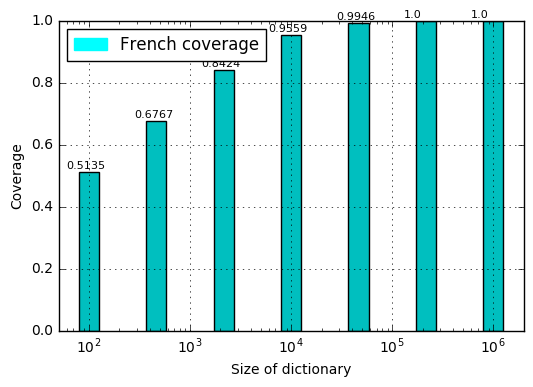

In [27]:
#NOT DONE!!!
french_cov = coverage_from_dict(french_counter, french_counter2)
show_plot(french_cov, 'cyan', 'French coverage')

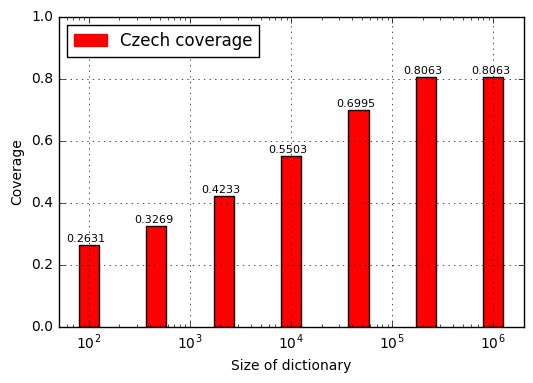

In [29]:
czech_cov = coverage_from_dict(czech_counter,czech_counte2)
show_plot(czech_cov, 'red', 'Czech coverage')

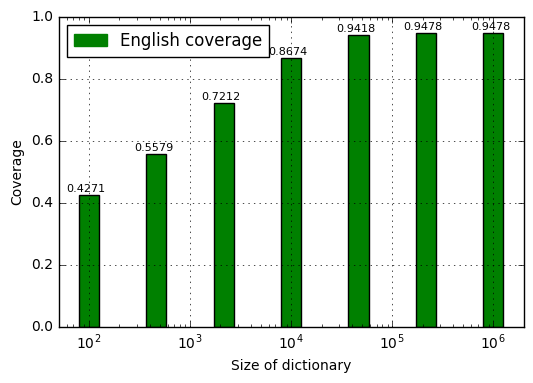

In [30]:
english_cov = coverage_from_dict(english_counter, english_counter2)
show_plot(english_cov, 'green', 'English coverage')

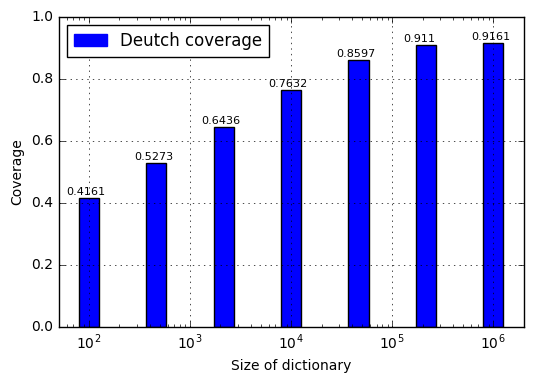

In [31]:
deutch_cov = coverage_from_dict(deutch_counter, deutch_counter2)
show_plot(deutch_cov, 'blue', 'Deutch coverage')

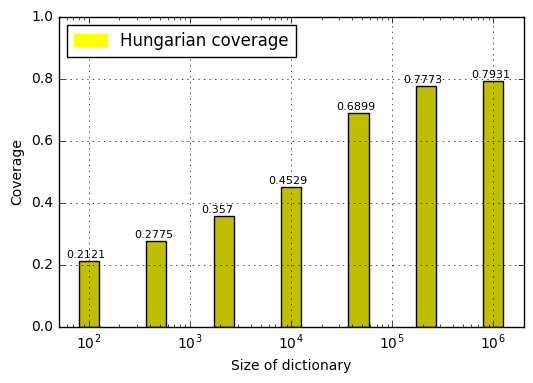

In [32]:
hun_cov = coverage_from_dict(hun_counter, hun_counter2)
show_plot(hun_cov, 'yellow', 'Hungarian coverage')

In [ ]:
"""with open("web2.2-freq-sorted.txt", "r", encoding="ISO-8859-2") as rr, open("hun_dict.txt", "w", encoding="utf-8") as ww:
    for line in rr:
        if len(line.split()) > 1:
            text = line.split()[0]
            text = text.lower()
            text = re.sub('['+string.punctuation+']', '', text)
            text = re.sub('['+string.digits+']+[.,]?['+string.digits+']*', '_NUM_', text)
            
        if text != "" and len(line.split()) > 1 and line.split()[1].isdigit():
            text += str("\t"+line.split()[1])
            ww.write(text+"\n")
""" 